# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)

In [3]:
cleaned_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## Extracting RFMS Features

Recency(R): Time since a customer's last purchase or transaction.

Frequency(F): Number of purchases or transactions a customer has made.

Monetary(M): Total amount of money a customer has spent with the business.

Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [3]:
df = create_rfms_features(cleaned_df)
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Recency,Frequency,Monetary,StdDev
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,5,66,2377.030303,3122.305223
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,0,30893,-898.270725,1845.782877
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,81,2,500.000000,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,5,26,9653.846154,19324.540611
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15 03:35:10+00:00,2,0,90,1,2000.000000,0.000000


In [4]:
rfms = ['Recency',	'Frequency',	'Monetary',	'StdDev']
rfms_df = df[rfms]
rfms_df.head()

,Recency,Frequency,Monetary,StdDev
0,5,66,2377.030303,3122.305223
1,0,30893,-898.270725,1845.782877
2,81,2,500.000000,0.000000
3,5,26,9653.846154,19324.540611
5,90,1,2000.000000,0.000000


In [5]:
rfms_df.describe()

,Recency,Frequency,Monetary,StdDev
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,30.136653,26.388105,9412.822418,4910.394012
std,26.942500,521.484360,20051.955695,12182.423691
min,0.000000,1.000000,-157142.857143,0.000000
25%,5.000000,2.000000,1614.358974,0.000000
50%,23.000000,4.000000,5000.000000,1804.670590
75%,53.000000,14.000000,9279.220779,3959.076535
max,90.000000,30893.000000,300000.000000,142200.000000


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>]], dtype=object)

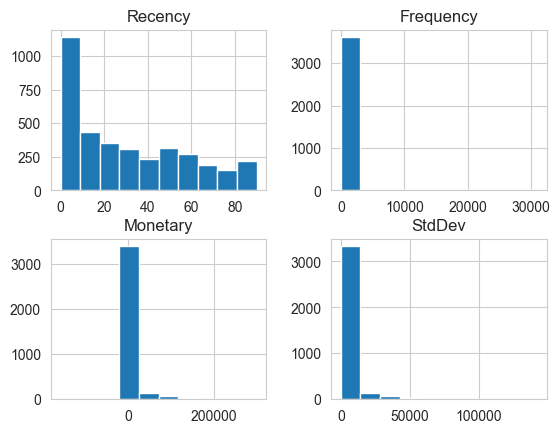

In [7]:
rfms_df.hist()

## Outliers detection in RFMS features

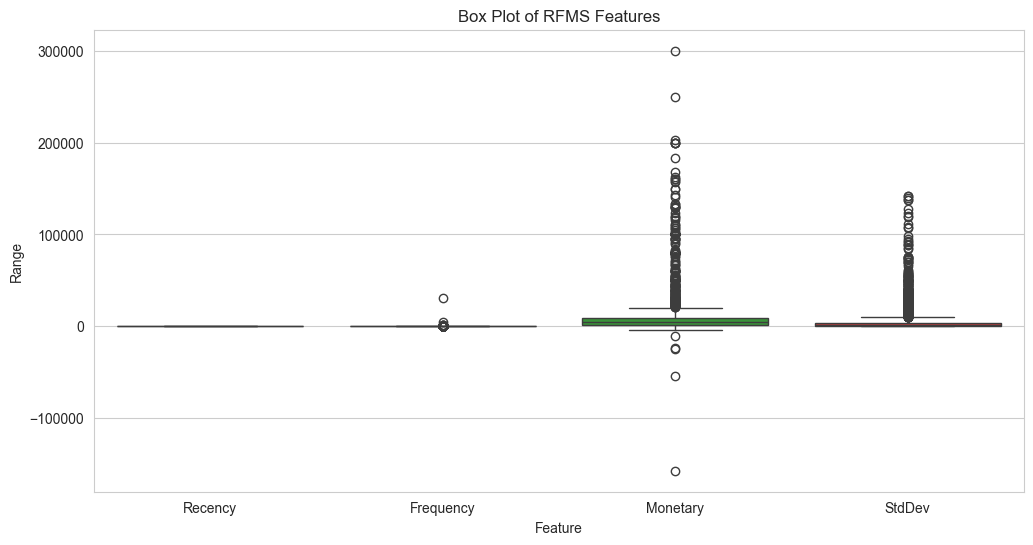

In [8]:
outlier_indices = detect_rfms_outliers(rfms_df)

## MinMaxScaler Transformation of RFMS Feature

In [5]:
scaled_df = scale_features(rfms_df)

In [6]:
scaled_df.describe()

,Recency,Frequency,Monetary,StdDev
count,3615.000000,3615.000000,3615.000000,3615.000000
mean,0.334852,0.000822,0.364341,0.034532
std,0.299361,0.016881,0.043864,0.085671
min,0.000000,0.000000,0.000000,0.000000
25%,0.055556,0.000032,0.347281,0.000000
50%,0.255556,0.000097,0.354687,0.012691
75%,0.588889,0.000421,0.364048,0.027842
max,1.000000,1.000000,1.000000,1.000000


In [7]:
scaled_df.head()

,Recency,Frequency,Monetary,StdDev
0,0.055556,0.002104,0.348950,0.021957
1,0.000000,1.000000,0.341785,0.012980
2,0.900000,0.000032,0.344844,0.000000
3,0.055556,0.000809,0.364868,0.135897
4,1.000000,0.000000,0.348125,0.000000


array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>],
       [<Axes: title={'center': 'Monetary'}>,
        <Axes: title={'center': 'StdDev'}>]], dtype=object)

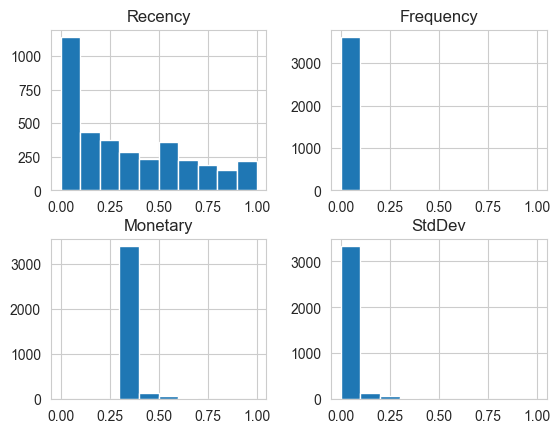

In [8]:
scaled_df.hist()

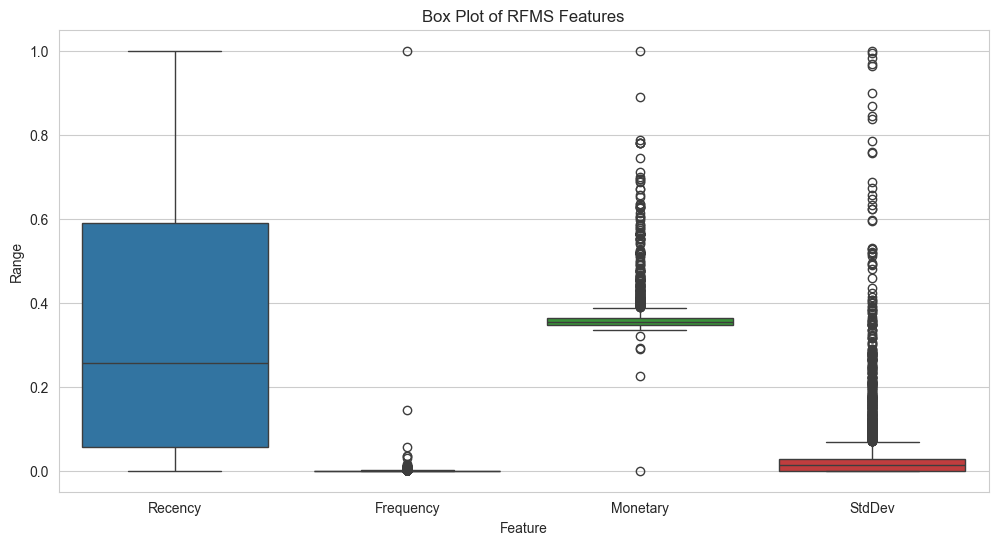

In [16]:
outlier_indices = detect_rfms_outliers(scaled_df)

## Visualizing in RFMS Space

### Comparative Scoring

In [7]:
bn_rfms_df =  assign_comparative_binary_score(scaled_df)
bn_rfms_df.head()

,Recency,Frequency,Monetary,StdDev,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg
0,0.055556,0.002104,0.348950,0.021957,1,1,0,0
1,0.000000,1.000000,0.341785,0.012980,1,1,0,0
2,0.900000,0.000032,0.344844,0.000000,0,0,0,0
3,0.055556,0.000809,0.364868,0.135897,1,0,1,1
4,1.000000,0.000000,0.348125,0.000000,0,0,0,0


### User classification

In [10]:
classified_df = apply_classification(bn_rfms_df)
classified_df.head()

,Recency,Frequency,Monetary,StdDev,<Recency_avg,>Frequency_avg,>Monetary_avg,>StdDev_avg,Classification
0,0.055556,0.002104,0.348950,0.021957,1,1,0,0,Low-risk
1,0.000000,1.000000,0.341785,0.012980,1,1,0,0,Low-risk
2,0.900000,0.000032,0.344844,0.000000,0,0,0,0,High-risk
3,0.055556,0.000809,0.364868,0.135897,1,0,1,1,Low-risk
4,1.000000,0.000000,0.348125,0.000000,0,0,0,0,High-risk


## Extract Time Features

In [15]:
processed_data = extract_time_features(processed_data)
processed_data.head()
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  object             
 1   BatchId                   95393 non-null  object             
 2   AccountId                 95393 non-null  object             
 3   SubscriptionId            95393 non-null  object             
 4   CustomerId                95393 non-null  object             
 5   CurrencyCode              95393 non-null  object             
 6   CountryCode               95393 non-null  int64              
 7   ProviderId                95393 non-null  object             
 8   ProductId                 95393 non-null  object             
 9   ProductCategory           95393 non-null  object             
 10  ChannelId                 95393 non-null  object             
 11  Amount         

In [16]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
TransactionId                 0
BatchId                       0
AccountId                     0
SubscriptionId                0
CustomerId                    0
CurrencyCode                  0
CountryCode                   0
ProviderId                    0
ProductId                     0
ProductCategory               0
ChannelId                     0
Amount                        0
Value                         0
TransactionStartTime          0
PricingStrategy               0
FraudResult                   0
TotalTransactionAmount        0
AverageTransactionAmount      0
TransactionCount              0
StdTransactionAmount        702
TransactionHour               0
TransactionDay                0
TransactionMonth              0
TransactionYear               0
dtype: int64


## Handle Missing Values

In [17]:
processed_data = handle_missing_values(processed_data)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  object             
 1   BatchId                   95393 non-null  object             
 2   AccountId                 95393 non-null  object             
 3   SubscriptionId            95393 non-null  object             
 4   CustomerId                95393 non-null  object             
 5   CurrencyCode              95393 non-null  object             
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  object             
 8   ProductId                 95393 non-null  object             
 9   ProductCategory           95393 non-null  object             
 10  ChannelId                 95393 non-null  object             
 11  Amount         

In [18]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
TransactionId               0
BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult                 0
TotalTransactionAmount      0
AverageTransactionAmount    0
TransactionCount            0
StdTransactionAmount        0
TransactionHour             0
TransactionDay              0
TransactionMonth            0
TransactionYear             0
dtype: int64


In [19]:
non_fraud_df = processed_data[processed_data['FraudResult'] == 1.0]
print(f"Number of fraudulent transactions: {len(non_fraud_df)}")

Number of fraudulent transactions: 19


In [20]:
print(processed_data['FraudResult'].value_counts())

FraudResult
0.0    95374
1.0       19
Name: count, dtype: int64


In [21]:
processed_data['FraudResult'].unique()

array([0., 1.])

## Encode Categorical Variables

In [22]:
processed_data = encode_categorical_variables(processed_data)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  int32              
 1   BatchId                   95393 non-null  int32              
 2   AccountId                 95393 non-null  int32              
 3   SubscriptionId            95393 non-null  int32              
 4   CustomerId                95393 non-null  int32              
 5   CurrencyCode              95393 non-null  int32              
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  int32              
 8   ProductId                 95393 non-null  int32              
 9   ProductCategory           95393 non-null  int32              
 10  ChannelId                 95393 non-null  int32              
 11  Amount         

In [23]:
print(processed_data['FraudResult'].value_counts())

FraudResult
0.0    95374
1.0       19
Name: count, dtype: int64


In [24]:
processed_data['FraudResult'].unique()

array([0., 1.])

## Normalize/Standardize Numerical Features

In [25]:
processed_data = normalize_and_standardize_numerical_features(processed_data)

In [26]:
processed_data['FraudResult'].unique()

array([-1.41143799e-02,  7.08497298e+01])

In [27]:
processed_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,1.097554,-0.015739,0.152495,1.668598,0.595592,0.0,0.0,1.025586,-1.579657,-0.797775,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
1,1.013197,-0.571710,0.866893,0.345454,0.595592,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
2,-0.287752,0.469870,0.371629,-1.201817,0.808675,0.0,0.0,1.025586,-1.718179,-0.797775,...,-0.352001,-0.014114,0.184840,-0.198738,-0.445132,-0.783585,-2.155000,-0.101329,0.848594,-0.994095
3,0.032646,-1.666070,0.996605,-1.226846,1.694602,0.0,0.0,-2.804723,-0.194446,4.365238,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095
4,-0.234407,0.055978,0.866893,0.345454,1.694602,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095


In [28]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95393 entries, 0 to 95392
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   TransactionId             95393 non-null  float64            
 1   BatchId                   95393 non-null  float64            
 2   AccountId                 95393 non-null  float64            
 3   SubscriptionId            95393 non-null  float64            
 4   CustomerId                95393 non-null  float64            
 5   CurrencyCode              95393 non-null  float64            
 6   CountryCode               95393 non-null  float64            
 7   ProviderId                95393 non-null  float64            
 8   ProductId                 95393 non-null  float64            
 9   ProductCategory           95393 non-null  float64            
 10  ChannelId                 95393 non-null  float64            
 11  Amount         

In [29]:
processed_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,1.097554,-0.015739,0.152495,1.668598,0.595592,0.0,0.0,1.025586,-1.579657,-0.797775,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
1,1.013197,-0.571710,0.866893,0.345454,0.595592,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.189932,-0.160503,-0.312141,-0.494065,-2.155000,-0.101329,0.848594,-0.994095
2,-0.287752,0.469870,0.371629,-1.201817,0.808675,0.0,0.0,1.025586,-1.718179,-0.797775,...,-0.352001,-0.014114,0.184840,-0.198738,-0.445132,-0.783585,-2.155000,-0.101329,0.848594,-0.994095
3,0.032646,-1.666070,0.996605,-1.226846,1.694602,0.0,0.0,-2.804723,-0.194446,4.365238,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095
4,-0.234407,0.055978,0.866893,0.345454,1.694602,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.195487,0.299301,-0.404212,0.850329,-1.948696,-0.101329,0.848594,-0.994095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95388,1.456555,1.642137,0.866893,0.345454,-0.437190,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.298784,0.140112,0.203909,1.362774,-0.710872,-0.324472,-0.874127,1.005941
95389,1.502419,-0.045114,-0.272017,-0.803622,0.185742,0.0,0.0,1.025586,-1.579657,-0.797775,...,-0.352001,-0.014114,0.187528,-0.121092,-0.398529,-0.567108,-0.710872,-0.324472,-0.874127,1.005941
95390,1.250545,-1.224231,0.866893,0.345454,0.185742,0.0,0.0,-0.506537,0.913723,0.492978,...,-0.352001,-0.014114,0.187528,-0.121092,-0.398529,-0.567108,-0.710872,-0.324472,-0.874127,1.005941
95391,-0.734051,0.935444,-1.992665,1.453573,-1.373989,0.0,0.0,1.025586,-0.610010,3.719862,...,-0.352001,-0.014114,0.224626,-0.097136,0.148212,-0.478303,-0.504567,-0.324472,-0.874127,1.005941


In [30]:
null_counts = processed_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
TransactionId               0
BatchId                     0
AccountId                   0
SubscriptionId              0
CustomerId                  0
CurrencyCode                0
CountryCode                 0
ProviderId                  0
ProductId                   0
ProductCategory             0
ChannelId                   0
Amount                      0
Value                       0
TransactionStartTime        0
PricingStrategy             0
FraudResult                 0
TotalTransactionAmount      0
AverageTransactionAmount    0
TransactionCount            0
StdTransactionAmount        0
TransactionHour             0
TransactionDay              0
TransactionMonth            0
TransactionYear             0
dtype: int64


In [33]:
print(processed_data['FraudResult'].value_counts())

FraudResult
-0.014114     95374
 70.849730       19
Name: count, dtype: int64


In [32]:
processed_data['FraudResult'].unique()

array([-1.41143799e-02,  7.08497298e+01])

## Save the the processed dataset

In [31]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(processed_data, output_folder, filename)

Dataset saved to ..\data\featured\featured_df.parquet
